# Neural Networks

Neural networks are well-suited to identifying non-linear patterns, as in patterns where there is nt a direct, one-to-one relationship between the input and the output. Instead, the networks identify patterns between combinations of inputs and a given output. 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

Using TensorFlow backend.


In [2]:
# load dataset
df = pd.read_csv(os.getcwd()+ "/Data/FT_data_final.csv")
# split into input (X) and output (Y) variables
dataset = df[['mean_loan_amt','mean_funded_amnt','mean_term','mean_annual_inc',
       'mean_dti','mean_delinq_2yrs','mean_mths_since_last_delinq','mean_open_cc','mean_pub_rec',
       'mean_revol_bal','mean_total_paymnt','mean_rec_int','mean_total_rec_late_fee','mean_recoveries',
       'mean_dti_joint','mean_annual_inc_joint','mean_total_cur_bal','int_rate']]
dataset = dataset.values
X = dataset[:,0:17]
Y = dataset[:,17]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=101)

# Training a Baseline model 

In [3]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(17, input_dim=17, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [4]:
# fix random seed for reproducibility
seed = 5
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=3, batch_size=2, verbose=0)

In [5]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=3, batch_size=2, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5, random_state=seed)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Standardized: -1.80 (0.02) MSE


# Using the trained models to predict price on new data

In [6]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <keras.wrappers.scikit_learn.KerasRegressor object at 0x10fb45290>)])

In [8]:
Y_pred1=pipeline.predict(X_test)
b=pipeline.score(X_test, Y_test)
print(b)

-1.8571726619948554


In [14]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(Y_test, Y_pred1)) 
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred1)))

mape = mean_absolute_percentage_error(Y_test, Y_pred1)

('Mean Absolute Percentage Error:', 8.505345351999932)
('Mean Absolute Error:', 1.0757885603366526)
('Mean Squared Error:', 1.857172652973753)
('Root Mean Squared Error:', 1.3627812197758498)


In [15]:
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

('Accuracy:', 91.49, '%.')


# Data Visualization

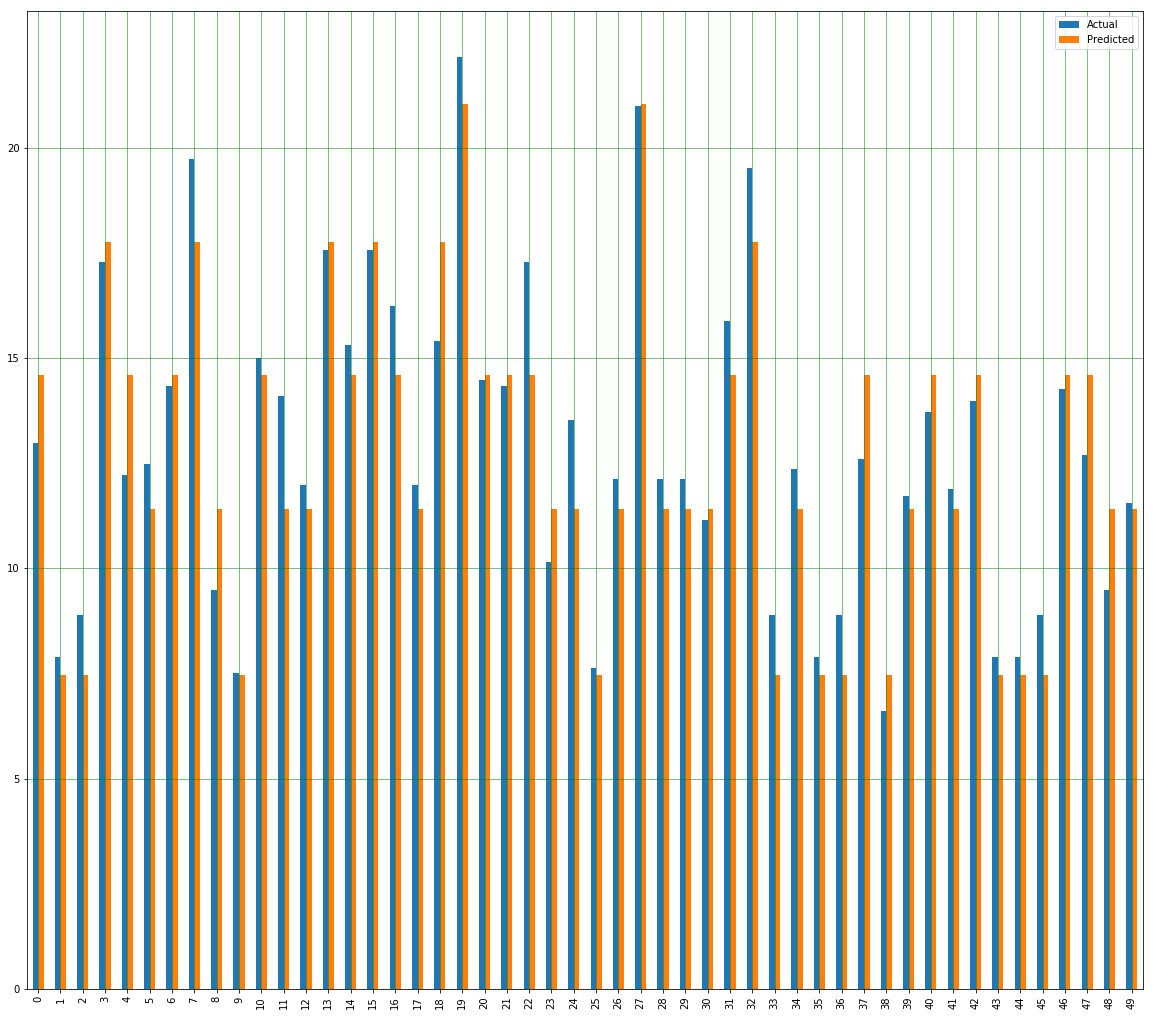

In [13]:
#Take the two values for comparison as actual and predicted
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred1})

#print the values
prd = pred_df.head(50)

#plot the values for comparison
prd.plot(kind='bar',figsize=(20,18))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()